In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [2]:
salary_train=pd.read_csv("D:/01_Interview_prep/10_Data_Science/Excel_R_Assignement/naive bayes/SalaryData_Train.csv")
salary_test=pd.read_csv('D:/01_Interview_prep/10_Data_Science/Excel_R_Assignement/naive bayes/SalaryData_Test.csv')
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
#taking only those column which have text/string values

string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [5]:
from sklearn import preprocessing
label_encoder =  preprocessing.LabelEncoder()

In [6]:

for i in string_columns:
    salary_train[i] = label_encoder.fit_transform(salary_train[i])
    salary_test[i] = label_encoder.fit_transform(salary_test[i])

In [7]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [8]:
col_names = list(salary_train.columns)
col_names

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native',
 'Salary']

In [9]:
# checking the distribution of the train data set we can see that the dataset is imbalance for salaries <=50K are more than >50K

salary_train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [10]:
#setting columns 0 to 12 as X(input) variables 
train_X= salary_train[col_names[0:13]]
#setrting column 13th as an Y(output) varible
train_Y= salary_train[col_names[13]]


In [11]:
#setting columns 0 to 12 as input variable for the test dataset
test_x = salary_test[col_names[0:13]]

#setting column 13th as an output variable for the test dataset

test_y = salary_test[col_names[13]]

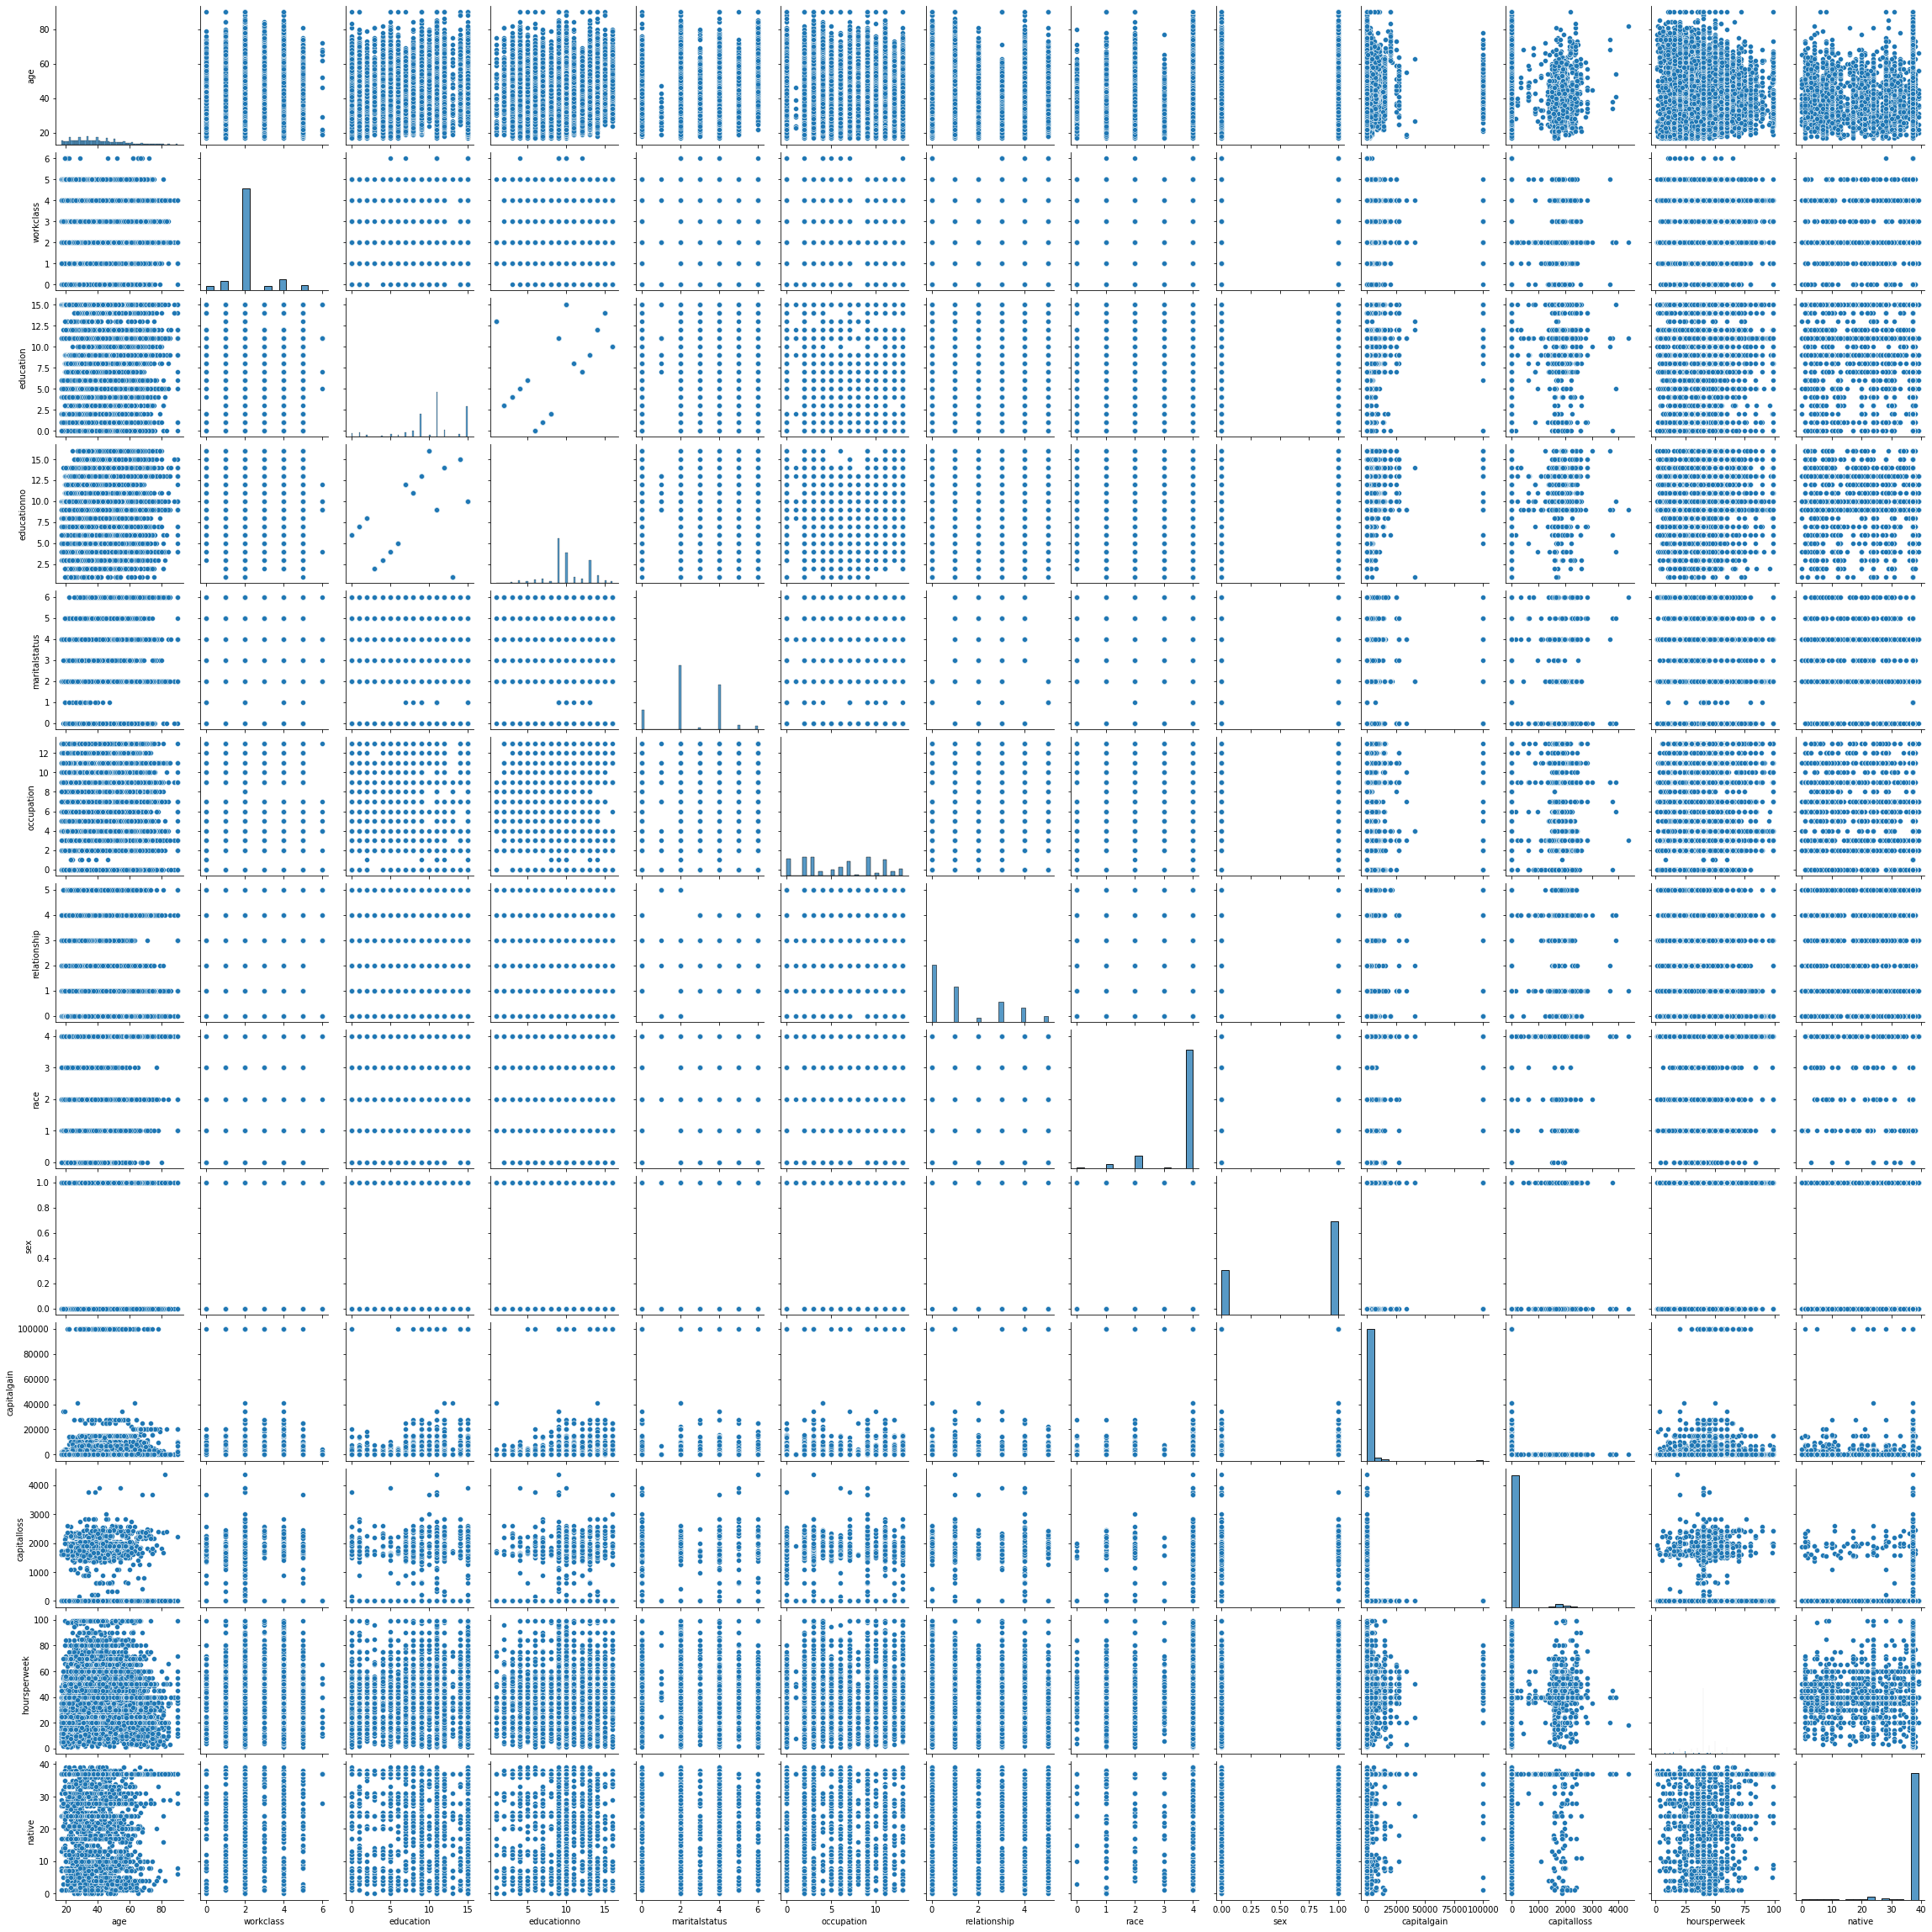

In [12]:
sns.pairplot(salary_train)

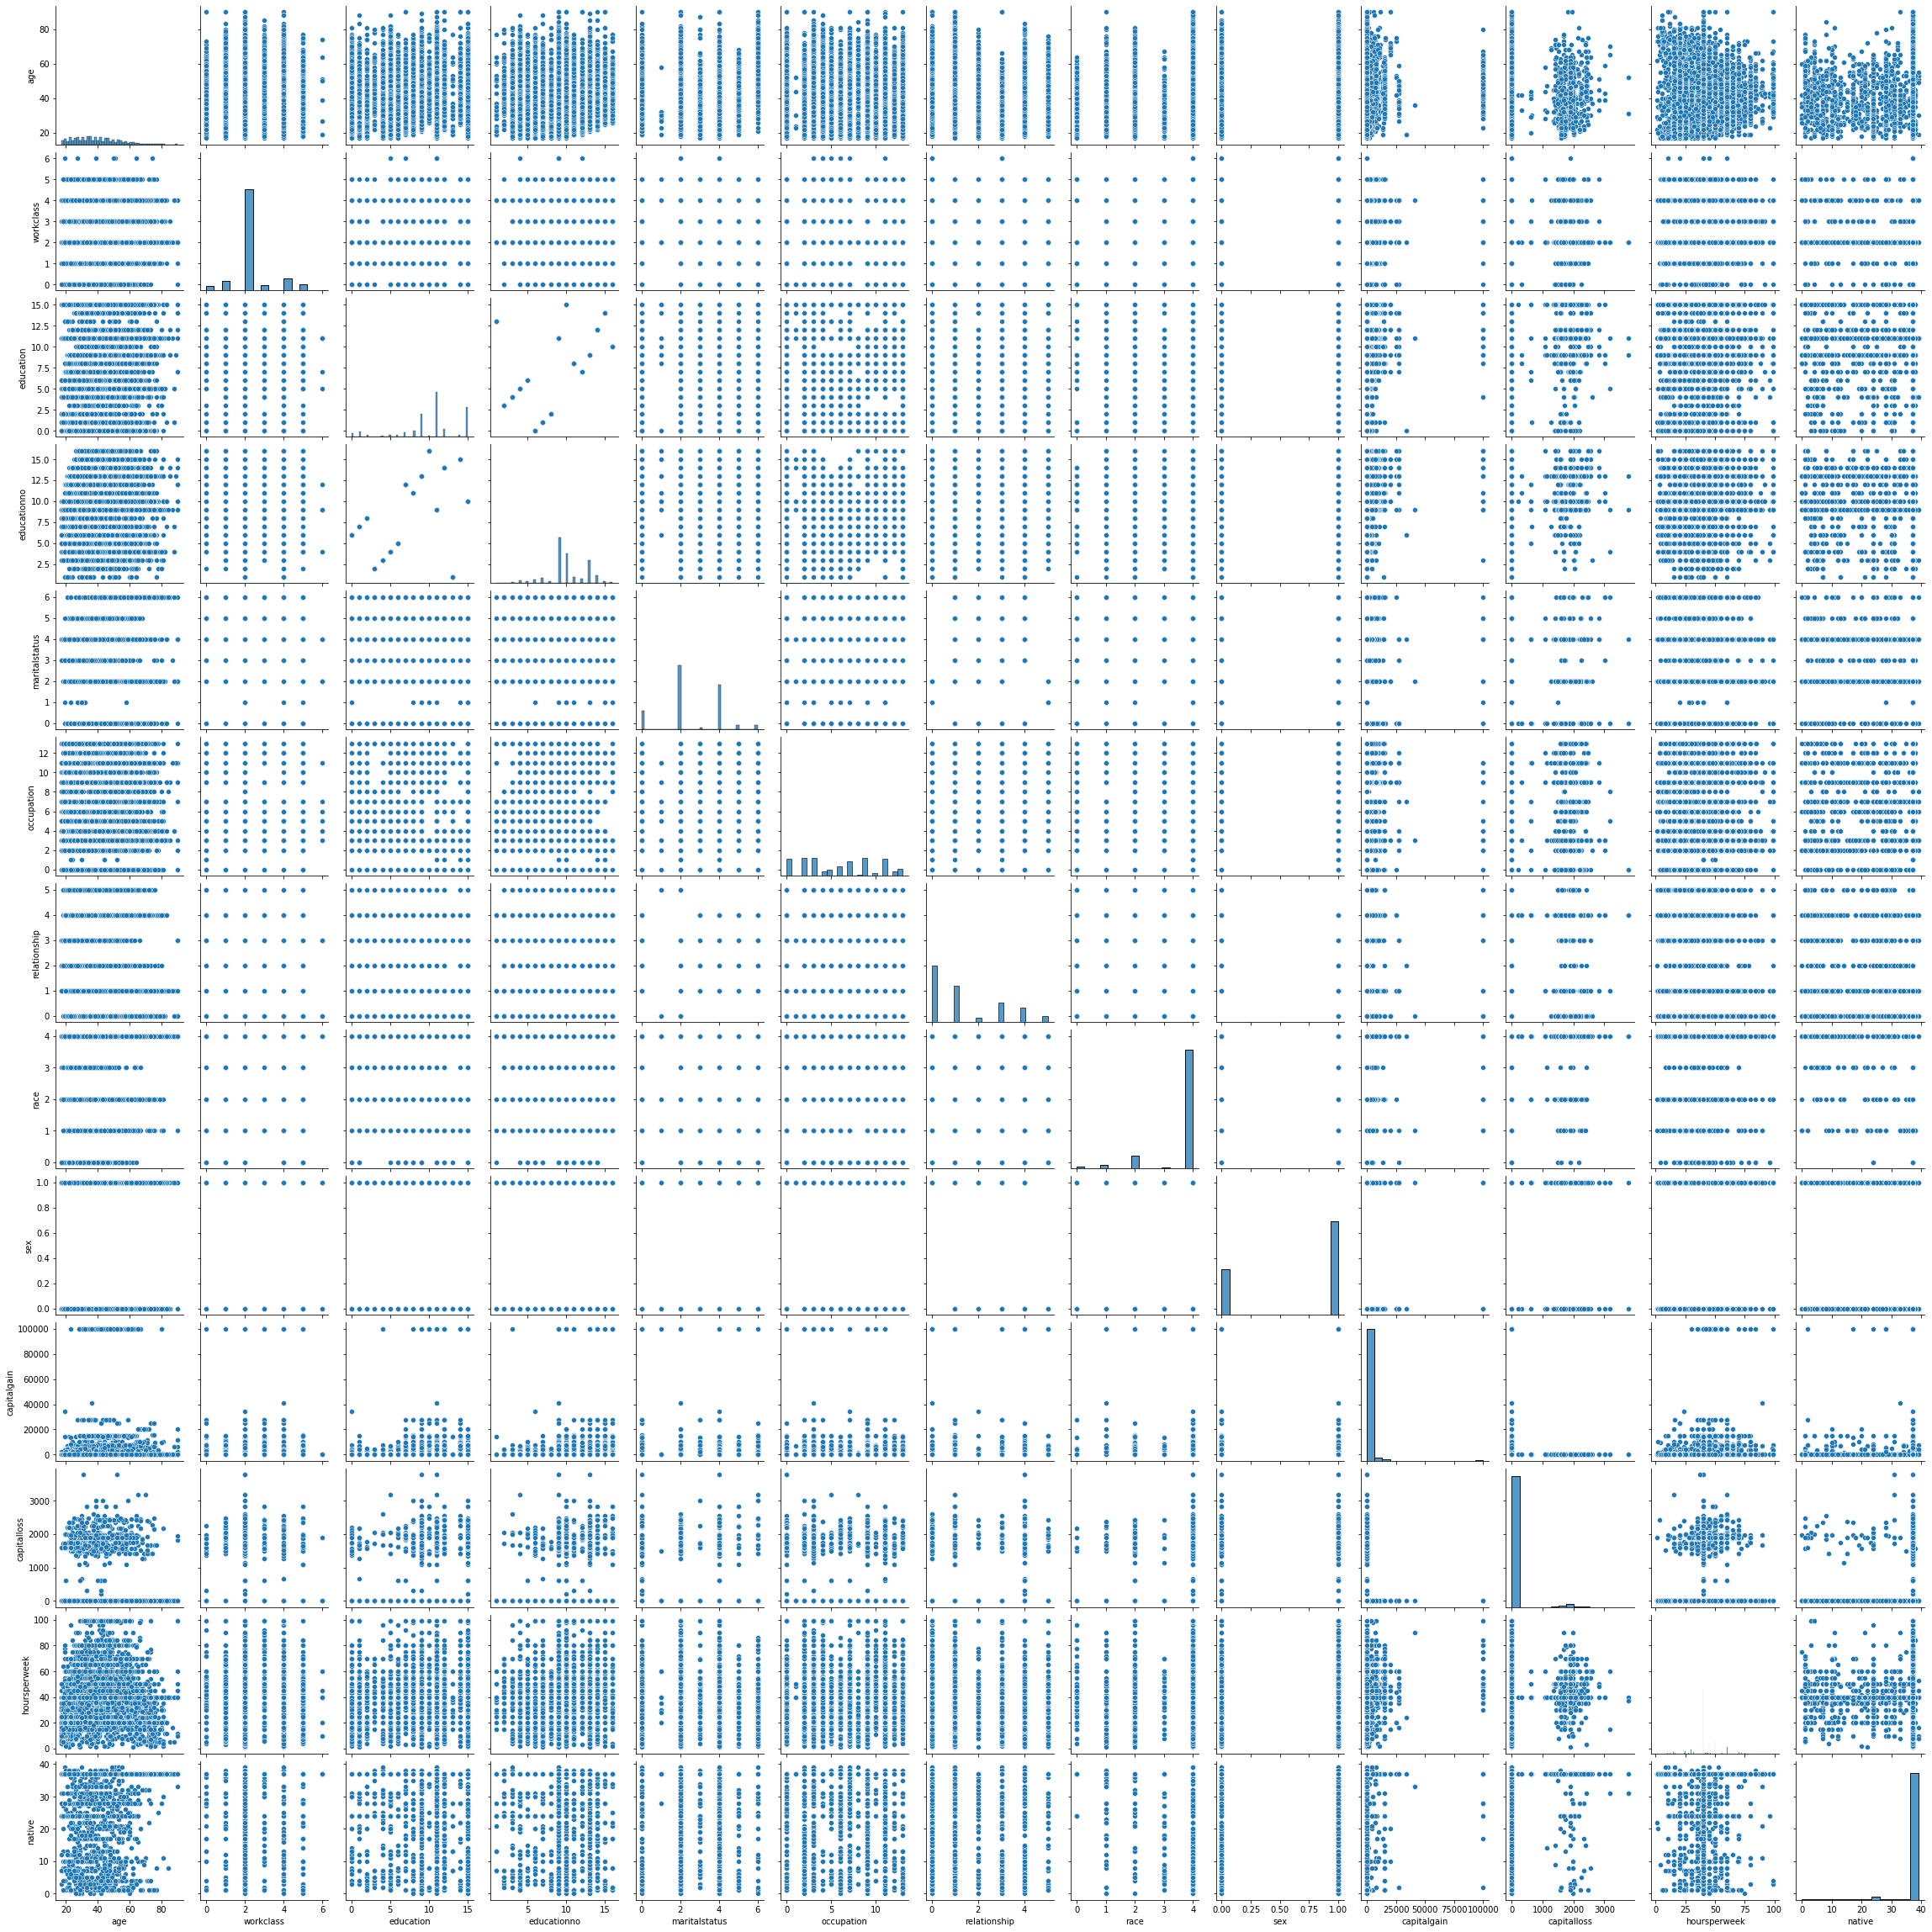

In [13]:
sns.pairplot(salary_test)

<AxesSubplot:ylabel='Salary'>

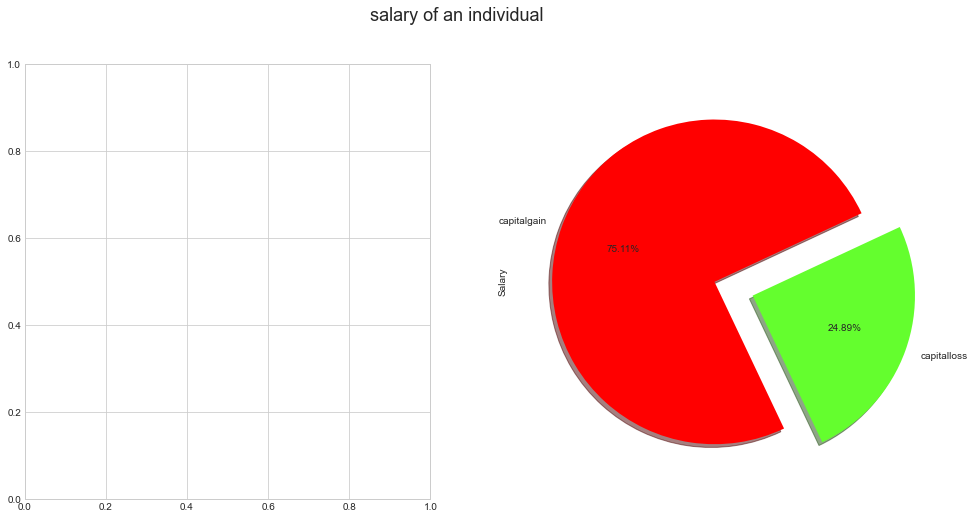

In [18]:
plt.subplots(1,2, figsize=(16,8))

colors = ["#FF0000", "#64FE2E"]
labels ="capitalgain", "capitalloss"

plt.suptitle('salary of an individual', fontsize=18)

salary_train["Salary"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=10, startangle=25)

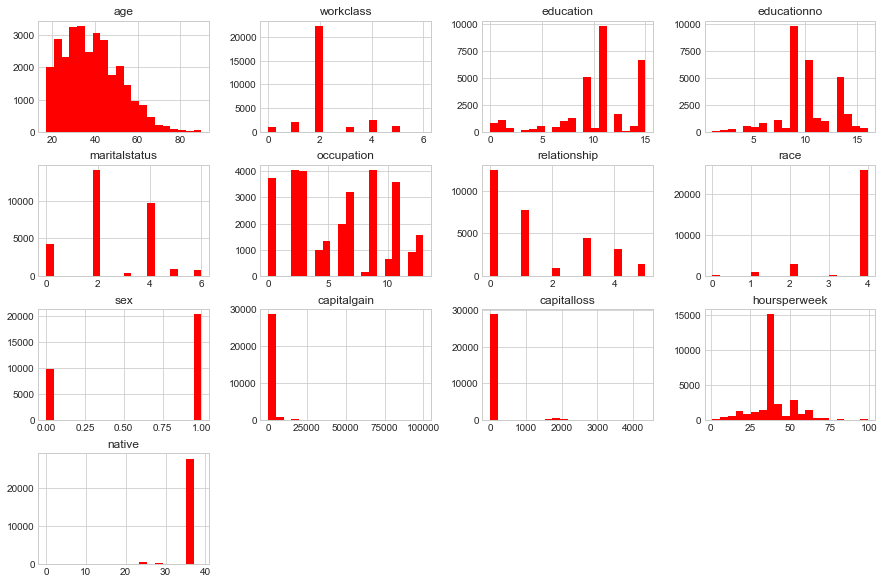

In [19]:
plt.style.use('seaborn-whitegrid')

salary_train.hist(bins=20, figsize=(15,10), color='red')
plt.show()

<AxesSubplot:ylabel='Salary'>

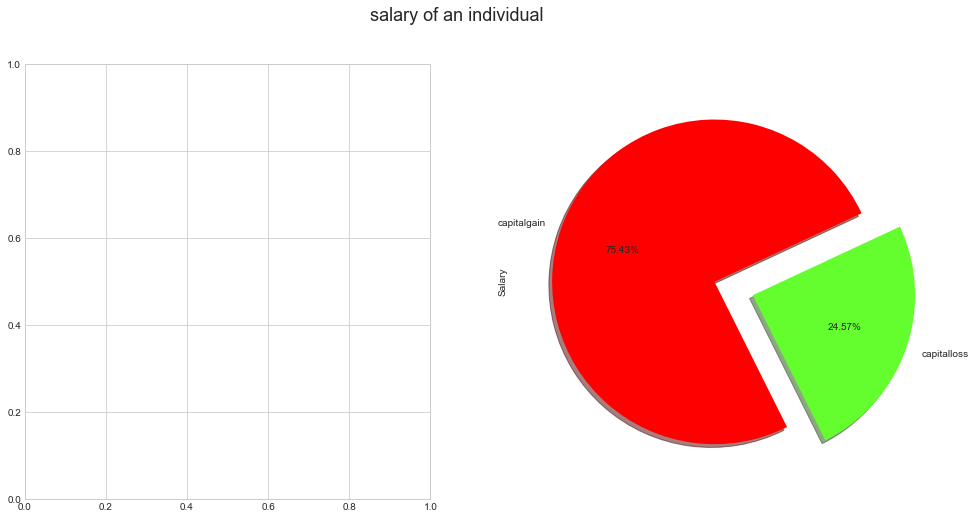

In [20]:
plt.subplots(1,2, figsize=(16,8))

colors = ["#FF0000", "#64FE2E"]
labels ="capitalgain", "capitalloss"

plt.suptitle('salary of an individual', fontsize=18)

salary_test["Salary"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=10, startangle=25)

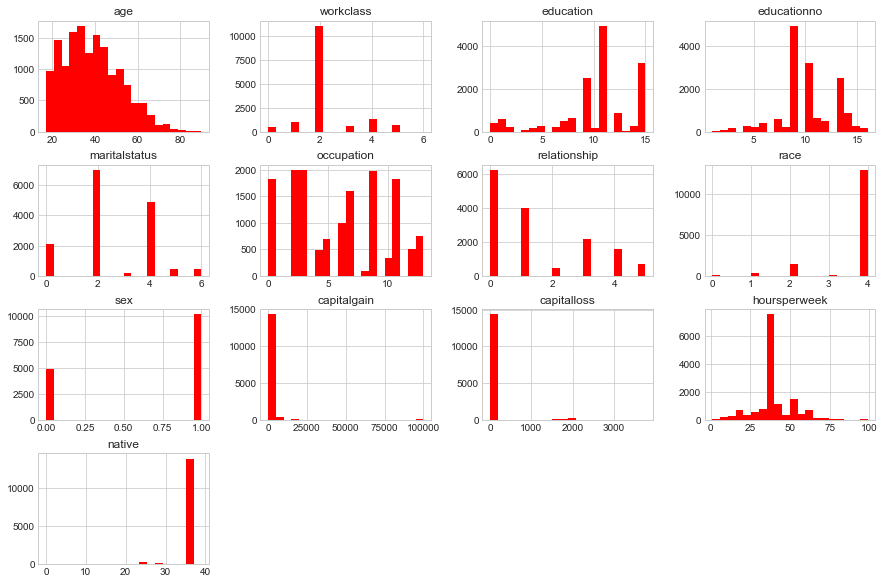

In [21]:
plt.style.use('seaborn-whitegrid')

salary_test.hist(bins=20, figsize=(15,10), color='red')
plt.show()

In [22]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [23]:
for i in string_columns:
    salary_train[i]=label_encoder.fit_transform(salary_train[i])
    salary_test[i]=label_encoder.fit_transform(salary_test[i])

In [24]:
col_names=list(salary_train.columns)
col_names

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native',
 'Salary']

In [25]:
train_X=salary_train[col_names[0:13]]
train_X

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [26]:
train_Y=salary_train[col_names[13]]
train_Y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [27]:
test_x=salary_test[col_names[0:13]]
test_x

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [28]:
test_y=salary_test[col_names[13]]
test_y

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

# Naive Bayes
#### Gaussian Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
Gau_model = GaussianNB()

In [30]:
#train the model with train dataset using the fit method
train_pred_gau=Gau_model.fit(train_X,train_Y).predict(train_X)
#generated the predcition accuracy on the training dataset
train_acc_gau=np.mean(train_pred_gau==train_Y)

In [34]:
#train dataset prediction accuracy
train_acc_gau

0.7953317197705646

In [31]:
test_gau = Gau_model.fit(train_X,train_Y)
test_pred_gau = test_gau.predict(test_x)

test_acc_gau = np.mean(test_pred_gau==test_y)

In [32]:
test_acc_gau

0.7946879150066402

In [33]:
from sklearn.metrics import accuracy_score
result = Gau_model.predict(test_x)
print(result)


[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' >50K' ' <=50K']


In [34]:
#Printing accuracy of the our model
accuracy_score(result,test_y)

0.7946879150066402

## c.	plot confusion matrix roc curve

In [35]:

#type(train_Y)
#test_y = test_y.to_numpy()

cm = confusion_matrix(test_y,test_pred_gau)

print(classification_report(test_y,test_pred_gau))


              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



In [37]:
cm

array([[10759,   601],
       [ 2491,  1209]], dtype=int64)

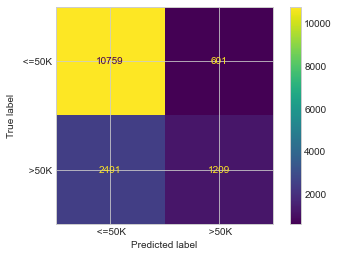

In [40]:
dsp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=test_gau.classes_)
dsp.plot()

#### Multinomial Naive Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

train_pred_multi = model.fit(train_X,train_Y).predict(train_X)

test_pred_multi =  model.fit(train_X,train_Y).predict(test_x)

train_acc_multi=np.mean(train_pred_multi==train_Y)
test_acc_multi=np.mean(test_pred_multi==test_y)



In [47]:
#Training Accuracy of the Multinomial Naive bayes model
train_acc_multi


0.7729186698053778

In [48]:
#test dataset accuracy of the multinomial naive bayes model
test_acc_multi

0.7749667994687915

In [49]:
cm2 = confusion_matrix(test_y,test_pred_multi)

print(classification_report(test_y,test_pred_multi))

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87     11360
        >50K       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



In [50]:
cm2

array([[10891,   469],
       [ 2920,   780]], dtype=int64)

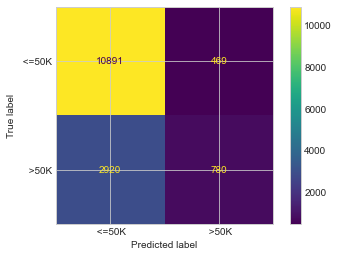

In [52]:
dsp = ConfusionMatrixDisplay(confusion_matrix=cm2,  display_labels=test_gau.classes_)
dsp.plot()

In [95]:
probs = model.predict_proba(test_x)


probs = probs[:,1]
print(probs)


auc = roc_auc_score(test_y, probs)
print(auc)
fpr,tpr,thresh=roc_curve(test_y, probs, pos_label='<=50K')
#plt.plot([0,1],[0,1], linestyle='--')
#plt.plot(fpr,tpr, marker="*", color='red')

[2.00945129e-136 1.13933193e-165 2.29132822e-149 ... 7.46534699e-173
 1.00000000e+000 8.11111235e-175]
0.4129301722497145


D:\python\lib\site-packages\sklearn\metrics\_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [88]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr, color='orange',label='ROC')
    plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver Operating Characteristics (ROC) curve')
    plt.legend()
    plt.show()

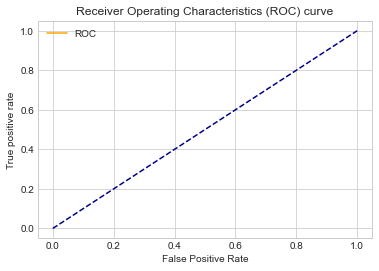

In [96]:
plot_roc_curve(fpr,tpr)